In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 18})
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

import tensorflow as tf
from tensorflow.keras import optimizers

In [2]:
def plot_model(model, feature_labmda, xy, labels, title=''):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-1.3,1.3, 400), np.linspace(-1.3,1.3, 400))
    input_xy = np.array([feature_labmda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])
    prediction = model(input_xy).numpy()
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(10, 10))
    cs = ax.contourf(xx, yy, Z, 20, cmap='coolwarm', alpha=.8)
    ax.clabel(cs, colors='k')
    cs = ax.contour(xx, yy, Z, cmap=plt.cm.Greys, levels=[0, 0.5], linestyles='--', linewidths=2)
    ax.clabel(cs, colors='k')
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')

    ax.set_xlim([-1.3, 1.3])
    ax.set_ylim([-1.3, 1.3])
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(title)
    plt.show()

In [3]:
def generate_batches(batch_size, features, labels):
    assert len(features) == len(labels)
    outout_batches = []

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)

    return outout_batches

## 신경망 모델의 필요성

In [4]:
# 데이터 생성
xy, labels = make_circles(n_samples=200, noise=0.1, random_state=717)
labels = labels.reshape(-1,1)

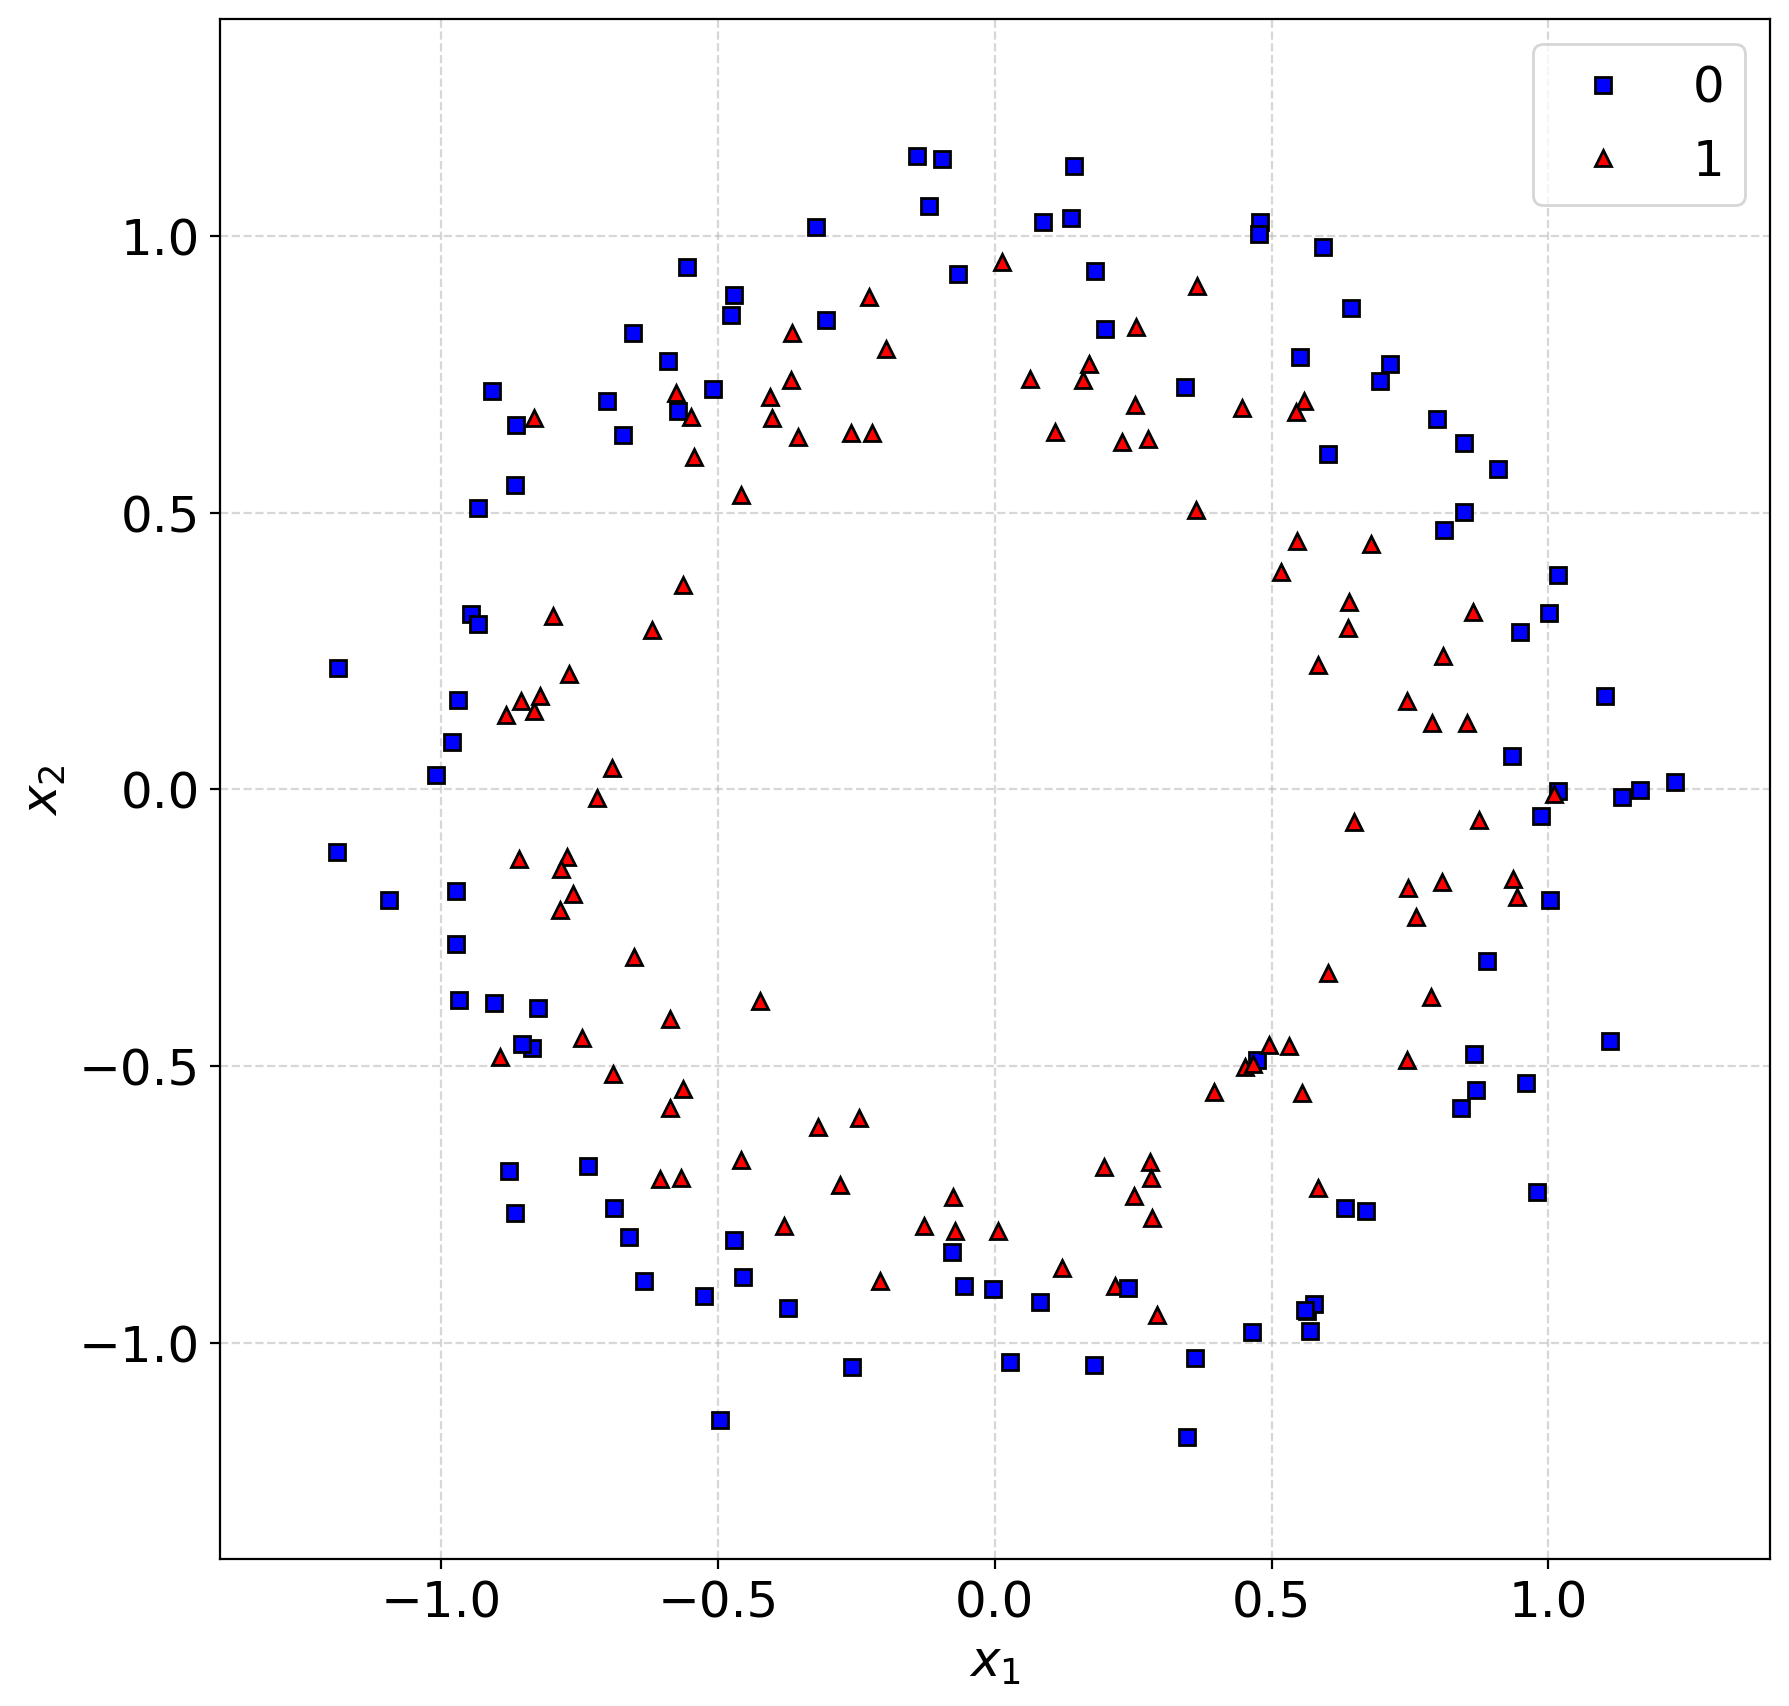

In [5]:
from pandas import DataFrame
# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(10, 10))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
plt.legend([0, 1])
plt.show()

In [6]:
# 특성값
f1 = lambda x,y: [x, y]
f2 = lambda x,y: [x**2, y**2]

In [7]:
# 선형 분류 모델
class MyModel(tf.keras.Model):
    def __init__(self, dim=1, **kwargs):
        super().__init__(**kwargs)
        self.W = tf.Variable(tf.ones([dim,1]), dtype=tf.float32) 
        self.b = tf.Variable(tf.ones([1]), dtype=tf.float32) 

    def call(self, x): 
        return tf.nn.sigmoid(tf.matmul(x, self.W) + self.b)

Epoch 1/15
8/8 [==============================] - 0s 1ms/step - loss: 0.8300
Epoch 2/15
8/8 [==============================] - 0s 801us/step - loss: 0.7122
Epoch 3/15
8/8 [==============================] - 0s 768us/step - loss: 0.7018
Epoch 4/15
8/8 [==============================] - 0s 811us/step - loss: 0.6967
Epoch 5/15
8/8 [==============================] - 0s 803us/step - loss: 0.6946
Epoch 6/15
8/8 [==============================] - 0s 793us/step - loss: 0.6960
Epoch 7/15
8/8 [==============================] - 0s 837us/step - loss: 0.6954
Epoch 8/15
8/8 [==============================] - 0s 690us/step - loss: 0.6948
Epoch 9/15
8/8 [==============================] - 0s 738us/step - loss: 0.6941
Epoch 10/15
8/8 [==============================] - 0s 810us/step - loss: 0.6939
Epoch 11/15
8/8 [==============================] - 0s 907us/step - loss: 0.6942
Epoch 12/15
8/8 [==============================] - 0s 718us/step - loss: 0.6943
Epoch 13/15
8/8 [==============================] - 

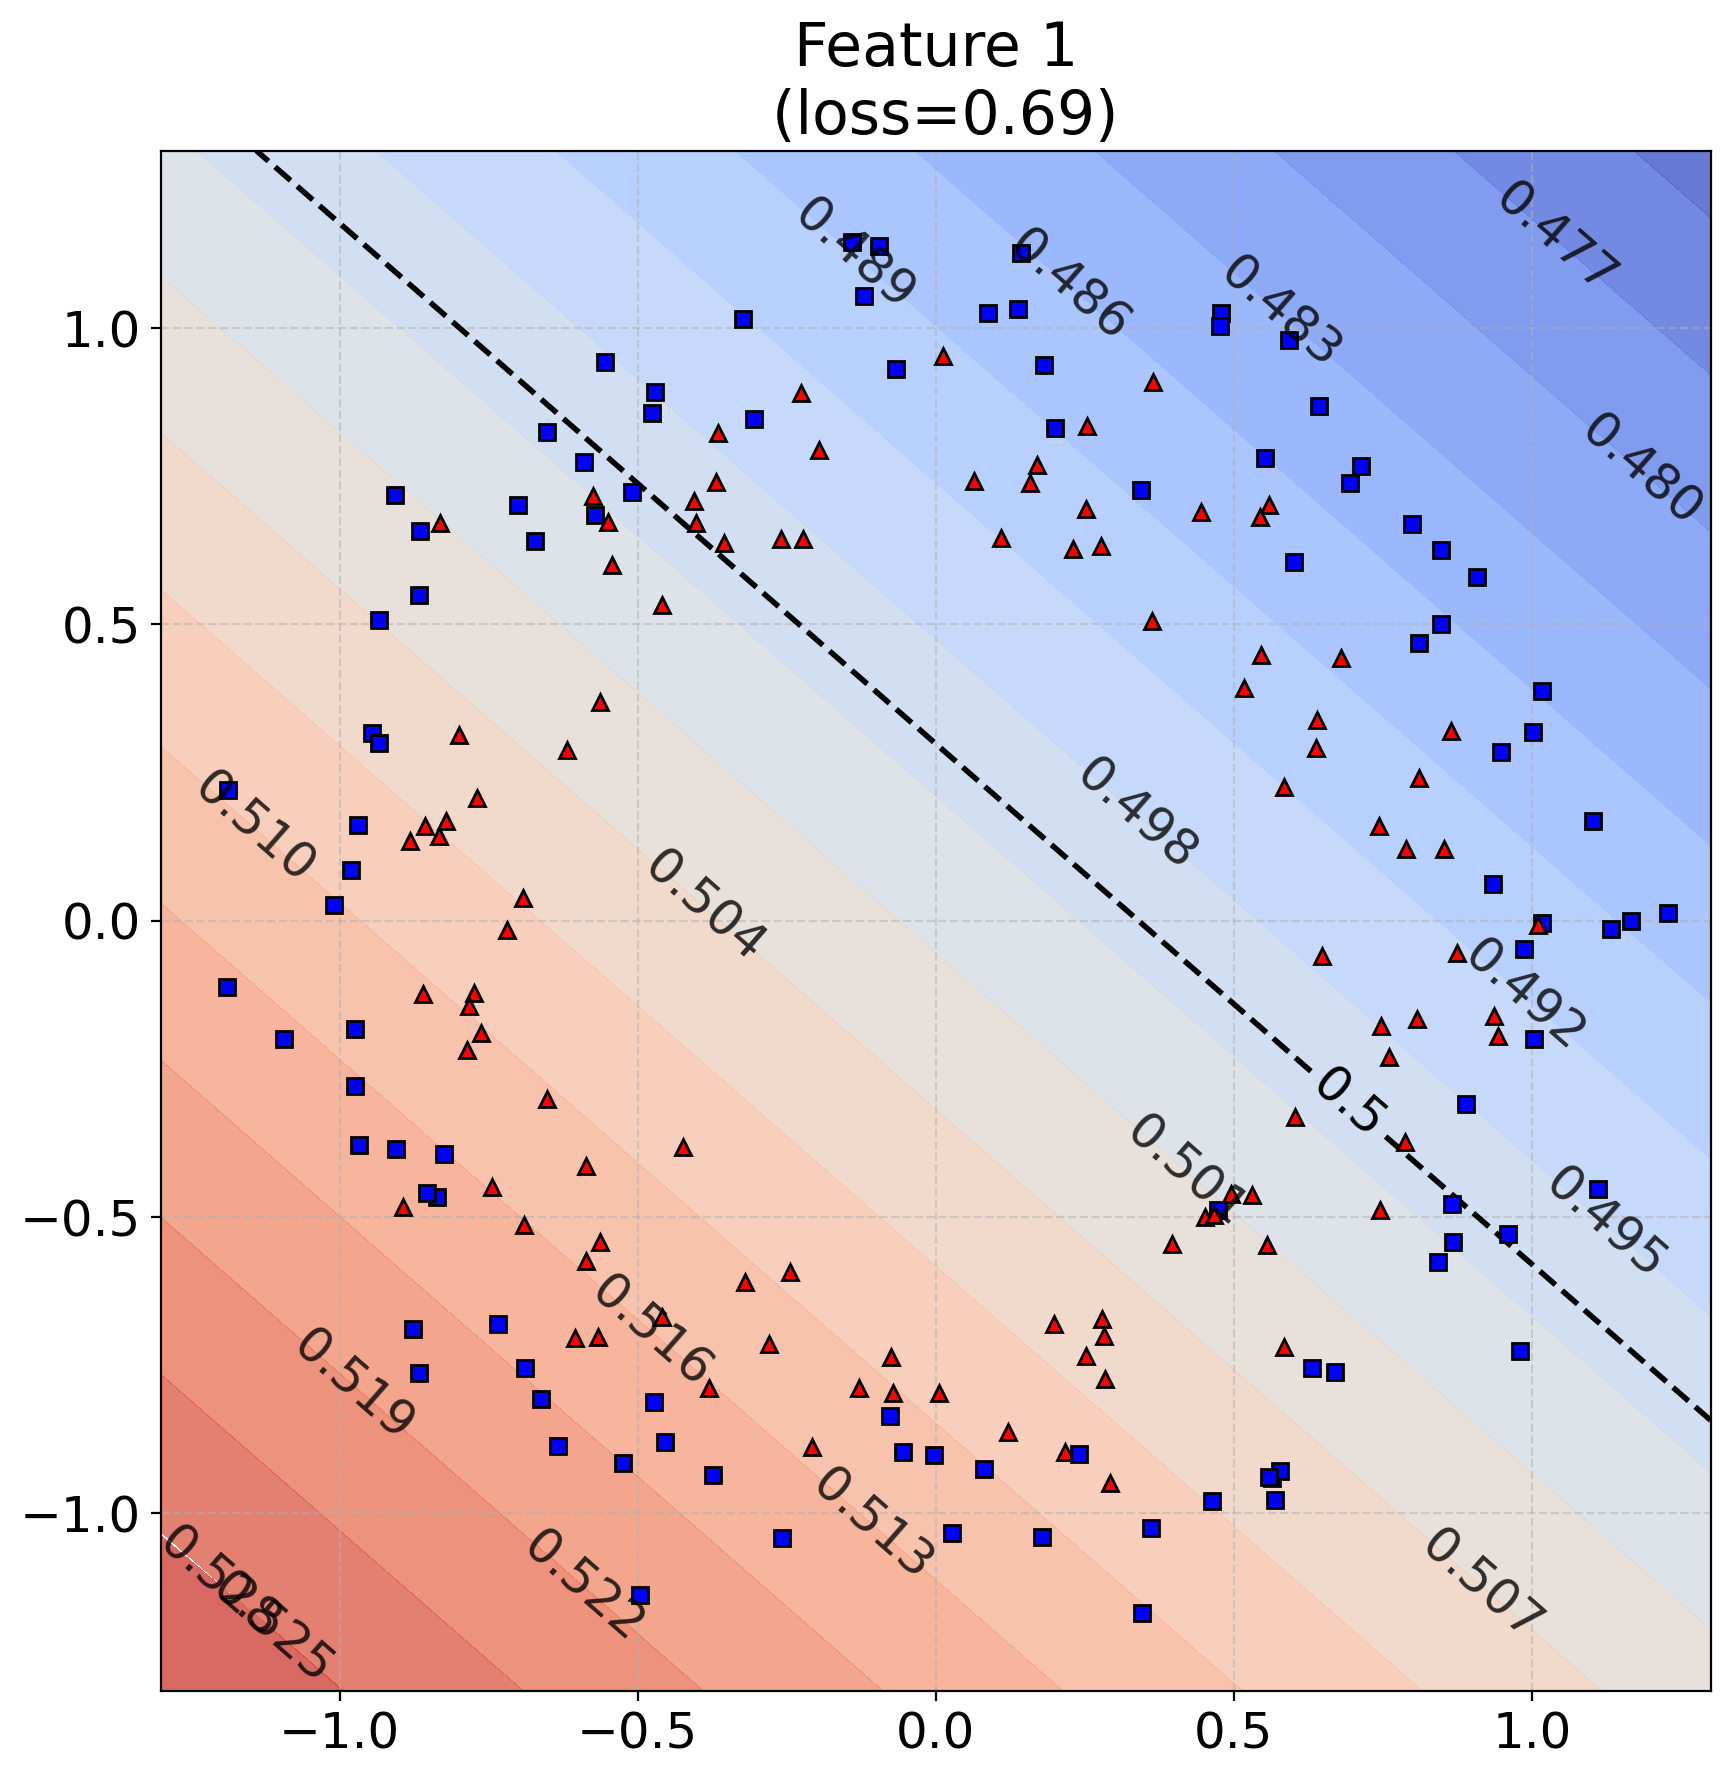

Epoch 1/15
8/8 [==============================] - 0s 1ms/step - loss: 0.9715
Epoch 2/15
8/8 [==============================] - 0s 988us/step - loss: 0.7111
Epoch 3/15
8/8 [==============================] - 0s 940us/step - loss: 0.6946
Epoch 4/15
8/8 [==============================] - 0s 1ms/step - loss: 0.6608
Epoch 5/15
8/8 [==============================] - 0s 722us/step - loss: 0.6266
Epoch 6/15
8/8 [==============================] - 0s 1ms/step - loss: 0.6098
Epoch 7/15
8/8 [==============================] - 0s 755us/step - loss: 0.5888
Epoch 8/15
8/8 [==============================] - 0s 1ms/step - loss: 0.5681
Epoch 9/15
8/8 [==============================] - 0s 754us/step - loss: 0.5486
Epoch 10/15
8/8 [==============================] - 0s 965us/step - loss: 0.5308
Epoch 11/15
8/8 [==============================] - 0s 773us/step - loss: 0.5149
Epoch 12/15
8/8 [==============================] - 0s 836us/step - loss: 0.4999
Epoch 13/15
8/8 [==============================] - 0s 656

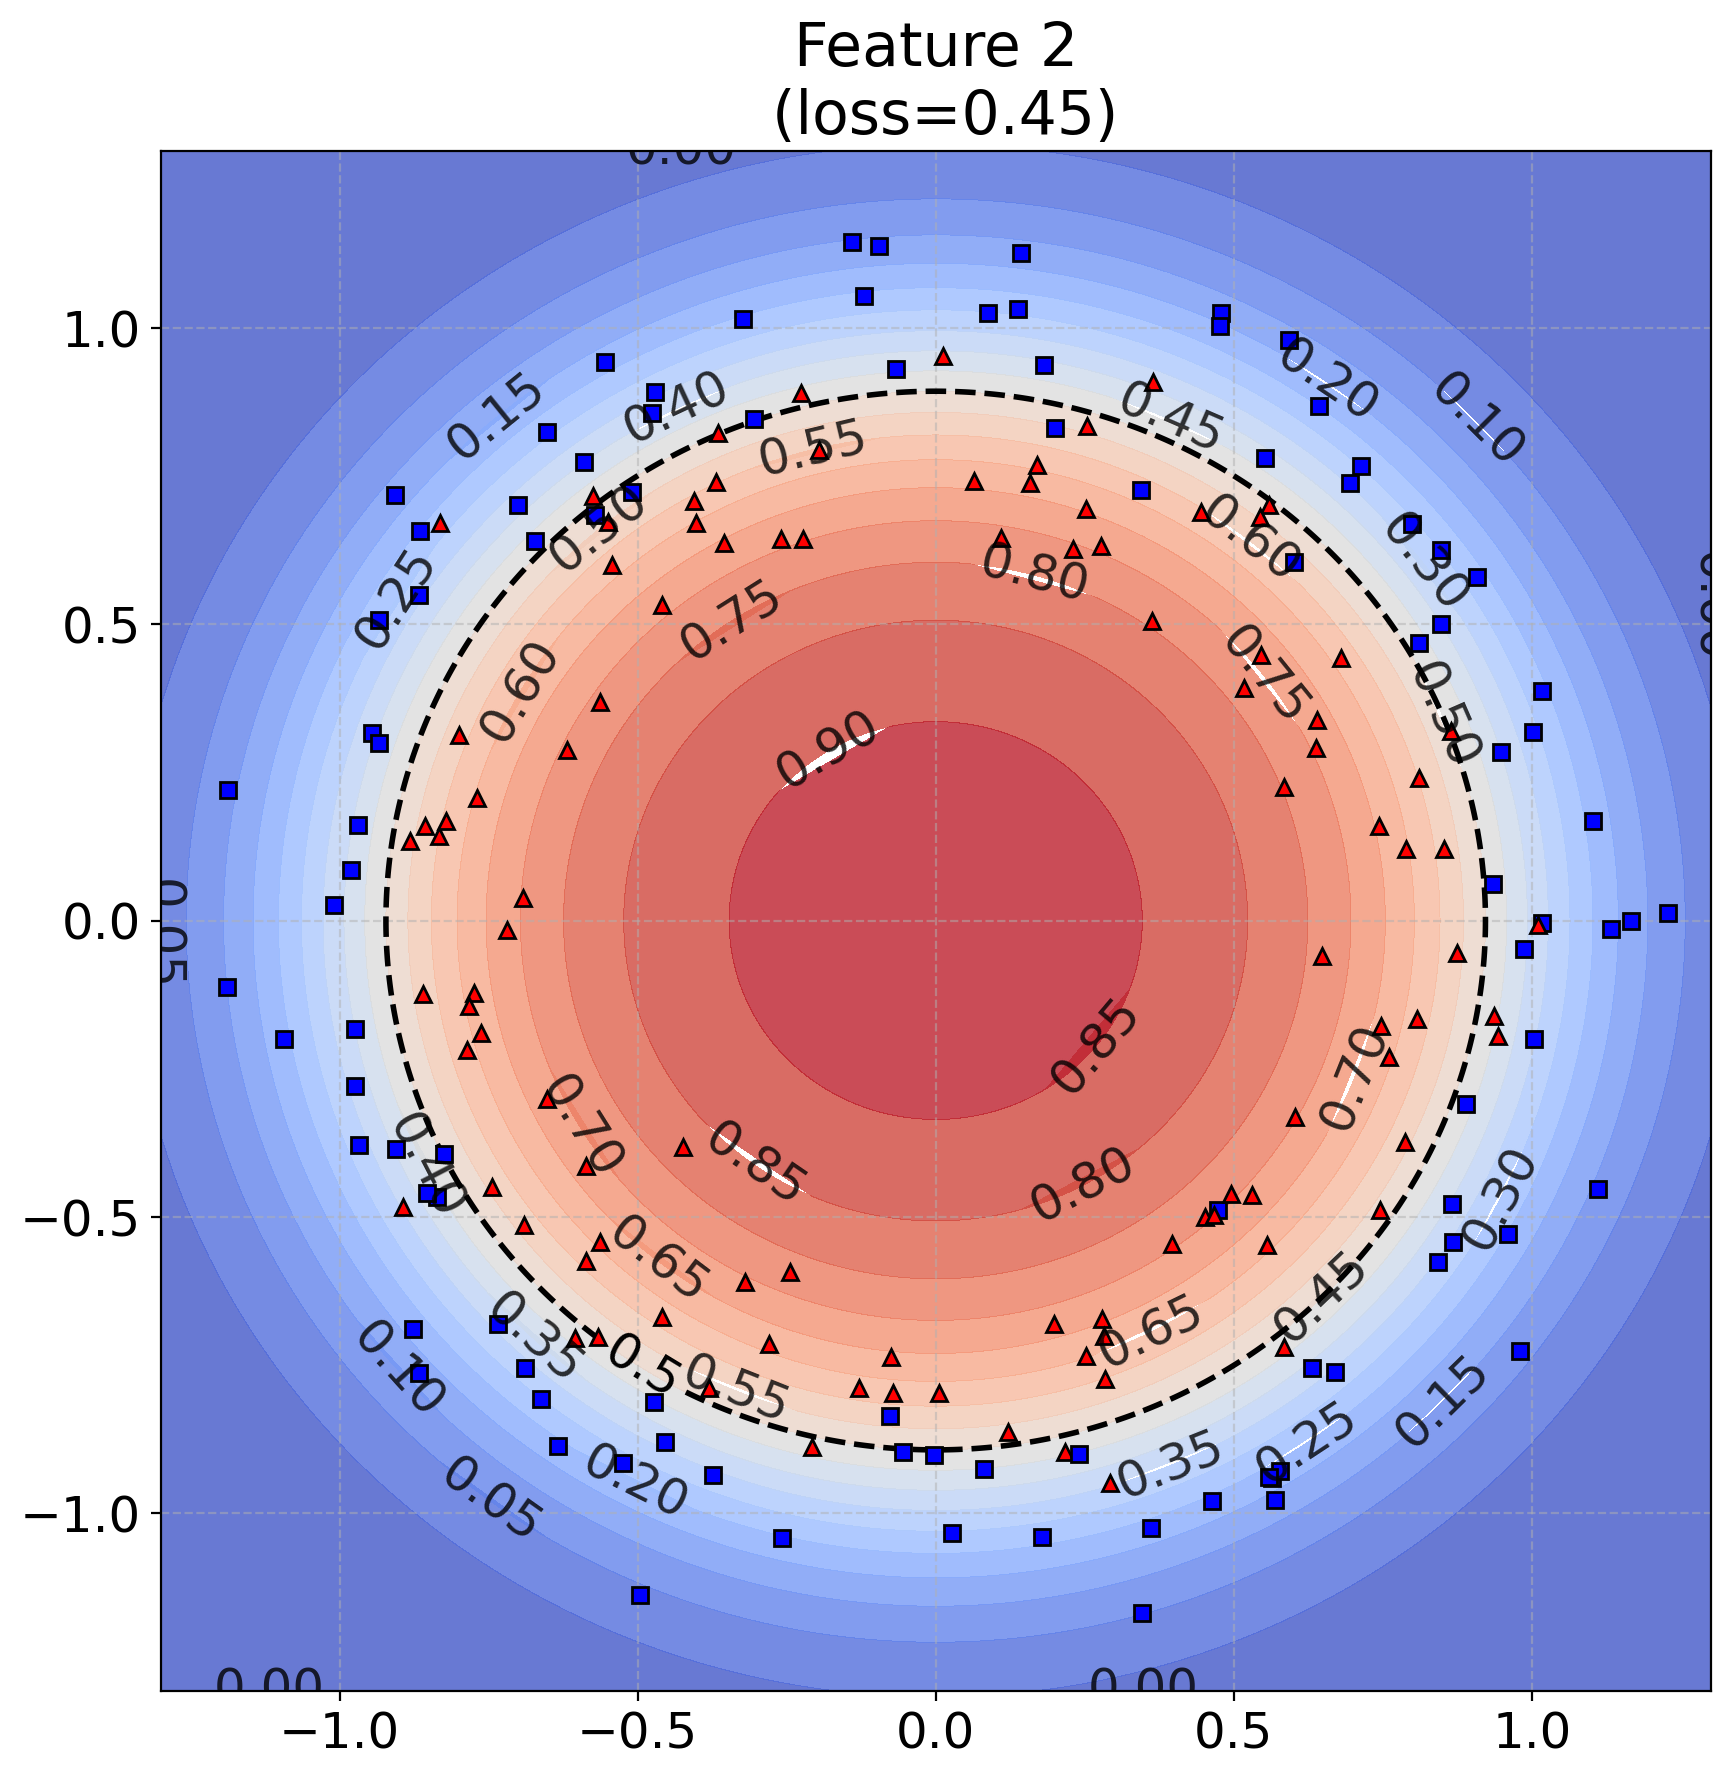

In [8]:
for i, f_fn in enumerate([f1, f2], 1):
    features = np.array([f_fn(xval, yval) for xval, yval in xy])
    dim_features = features.shape[1]

    model = MyModel(dim_features)

    np.random.seed(7382)
    shuffled_id = np.arange(0, len(features))
    np.random.shuffle(shuffled_id)
    shuffled_features = features[shuffled_id]
    shuffled_labels = labels[shuffled_id]

    MaxEpochs = 15
    batch_size = 25
    lr = 0.1

    model.compile(optimizer = tf.keras.optimizers.legacy.Adam(lr), loss = tf.keras.losses.BinaryCrossentropy())
    model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)
    
    prediction_values = model(features).numpy()
    loss = lambda y, yhat: tf.reduce_mean(-y * tf.math.log(yhat) - (1-y) * tf.math.log(1-yhat))
    final_loss = loss(labels, prediction_values)
    print('W={}, b={}'.format(model.W.numpy().flatten(), model.b.numpy()))

    plot_model(model, f_fn, xy, labels, 'Feature {}\n (loss={:1.2f})'.format(i, final_loss))

## 다양한 데이터 분포와 신경망 분류 모델

**<span style="font-size: 20px; color: blue">(Exercise 1) </span>** 

원형 데이터 분포에 대하여 신경망 분류 모델을 정의하고 학습하시오.

- 활성함수는 모든 레이어에서 시그모이드 함수를 사용하시오.

In [9]:
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

In [24]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
        tf.random.set_seed(20)

        num_hidden1 = 100
        num_hidden2 = 100
        num_hidden3 = 100
        num_hidden4 = 100
        
        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624))
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624))

        self.W2 = tf.Variable(tf.random.normal([num_hidden1 , num_hidden2], seed=624))
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624))

        self.W3 = tf.Variable(tf.random.normal([num_hidden2 , num_hidden3], seed=624))
        self.b3 = tf.Variable(tf.random.normal([num_hidden3], seed=624))

        self.W4 = tf.Variable(tf.random.normal([num_hidden3 , num_hidden4], seed=624))
        self.b4 = tf.Variable(tf.random.normal([num_hidden4], seed=624))

        self.W5 = tf.Variable(tf.random.normal([num_hidden4 , 1], seed=624))
        self.b5 = tf.Variable(tf.random.normal([1], seed=624))

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.relu(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.relu(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        h3 = tf.nn.relu(l3)

        l4 = tf.matmul(h3, self.W4) + self.b4
        h4 = tf.nn.sigmoid(l4)
        
        l5 = tf.matmul(h4, self.W5) + self.b5
        yhat = tf.nn.sigmoid(l5)
        return yhat

In [25]:
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

In [26]:
# 하이퍼 파라미터
MaxEpochs = 1000
lr = 0.001
batch_size = 10

In [27]:
# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.legacy.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

In [28]:
# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/1000
20/20 [==============================] - 0s 1ms/step - loss: 1.1179 - accuracy: 0.4900
Epoch 2/1000
20/20 [==============================] - 0s 951us/step - loss: 0.7299 - accuracy: 0.6350
Epoch 3/1000
20/20 [==============================] - 0s 855us/step - loss: 0.6429 - accuracy: 0.6550
Epoch 4/1000
20/20 [==============================] - 0s 972us/step - loss: 0.5960 - accuracy: 0.6800
Epoch 5/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.7200
Epoch 6/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7250
Epoch 7/1000
20/20 [==============================] - 0s 960us/step - loss: 0.5178 - accuracy: 0.7850
Epoch 8/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.7450
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.7150
Epoch 10/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy

20/20 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.8650
Epoch 83/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8850
Epoch 84/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.8900
Epoch 85/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.8250
Epoch 86/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8950
Epoch 87/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.9150
Epoch 88/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2672 - accuracy: 0.8850
Epoch 89/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.8900
Epoch 90/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2789 - accuracy: 0.8800
Epoch 91/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.8800
Epoc

20/20 [==============================] - 0s 1ms/step - loss: 0.2728 - accuracy: 0.8800
Epoch 163/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.9000
Epoch 164/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8800
Epoch 165/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2890 - accuracy: 0.8750
Epoch 166/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8800
Epoch 167/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3204 - accuracy: 0.8650
Epoch 168/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2894 - accuracy: 0.8850
Epoch 169/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8850
Epoch 170/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.8600
Epoch 171/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8800
Epoch 243/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2959 - accuracy: 0.8700
Epoch 244/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8800
Epoch 245/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2902 - accuracy: 0.8900
Epoch 246/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.8900
Epoch 247/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2853 - accuracy: 0.8800
Epoch 248/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2855 - accuracy: 0.8750
Epoch 249/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 0.9000
Epoch 250/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2696 - accuracy: 0.8850
Epoch 251/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2940 - accuracy: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.8950
Epoch 323/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.9150
Epoch 324/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2112 - accuracy: 0.9150
Epoch 325/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.9200
Epoch 326/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2116 - accuracy: 0.9150
Epoch 327/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.9250
Epoch 328/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2140 - accuracy: 0.9200
Epoch 329/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2112 - accuracy: 0.9300
Epoch 330/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2464 - accuracy: 0.9000
Epoch 331/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.2646 - accuracy: 0.8850
Epoch 403/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8800
Epoch 404/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.8950
Epoch 405/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2571 - accuracy: 0.8700
Epoch 406/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.9000
Epoch 407/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2309 - accuracy: 0.9000
Epoch 408/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.9050
Epoch 409/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2184 - accuracy: 0.9050
Epoch 410/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.8950
Epoch 411/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.9000
Epoch 483/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2280 - accuracy: 0.8850
Epoch 484/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.9050
Epoch 485/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.9050
Epoch 486/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9000
Epoch 487/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.8950
Epoch 488/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2109 - accuracy: 0.9100
Epoch 489/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9100
Epoch 490/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2128 - accuracy: 0.9000
Epoch 491/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.9000
Epoch 563/1000
20/20 [==============================] - 0s 925us/step - loss: 0.2186 - accuracy: 0.9100
Epoch 564/1000
20/20 [==============================] - 0s 975us/step - loss: 0.2158 - accuracy: 0.9150
Epoch 565/1000
20/20 [==============================] - 0s 891us/step - loss: 0.2103 - accuracy: 0.9250
Epoch 566/1000
20/20 [==============================] - 0s 934us/step - loss: 0.2297 - accuracy: 0.9050
Epoch 567/1000
20/20 [==============================] - 0s 955us/step - loss: 0.2248 - accuracy: 0.9100
Epoch 568/1000
20/20 [==============================] - 0s 962us/step - loss: 0.2188 - accuracy: 0.9150
Epoch 569/1000
20/20 [==============================] - 0s 939us/step - loss: 0.2428 - accuracy: 0.8900
Epoch 570/1000
20/20 [==============================] - 0s 905us/step - loss: 0.2162 - accuracy: 0.8950
Epoch 571/1000
20/20 [==============================] - 0s 939us/step - loss: 0.2

20/20 [==============================] - 0s 1ms/step - loss: 0.2189 - accuracy: 0.9050
Epoch 643/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9000
Epoch 644/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2368 - accuracy: 0.8850
Epoch 645/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2269 - accuracy: 0.8900
Epoch 646/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2257 - accuracy: 0.8850
Epoch 647/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2334 - accuracy: 0.9050
Epoch 648/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.8900
Epoch 649/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2390 - accuracy: 0.8950
Epoch 650/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.8900
Epoch 651/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2556 - accuracy: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.2397 - accuracy: 0.9100
Epoch 723/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2684 - accuracy: 0.9150
Epoch 724/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.8900
Epoch 725/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2365 - accuracy: 0.8950
Epoch 726/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.8850
Epoch 727/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2537 - accuracy: 0.8850
Epoch 728/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.8850
Epoch 729/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.8800
Epoch 730/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2522 - accuracy: 0.8850
Epoch 731/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.2420 - accuracy: 0.9050
Epoch 803/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.9050
Epoch 804/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.9000
Epoch 805/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.9050
Epoch 806/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2222 - accuracy: 0.9050
Epoch 807/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.9000
Epoch 808/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2166 - accuracy: 0.8750
Epoch 809/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2017 - accuracy: 0.8900
Epoch 810/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.8950
Epoch 811/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2153 - accuracy: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.9050
Epoch 883/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1993 - accuracy: 0.9000
Epoch 884/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9050
Epoch 885/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1933 - accuracy: 0.9150
Epoch 886/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1974 - accuracy: 0.9050
Epoch 887/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2181 - accuracy: 0.8950
Epoch 888/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2427 - accuracy: 0.8800
Epoch 889/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2594 - accuracy: 0.8850
Epoch 890/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.8750
Epoch 891/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.8950
Epoch 963/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.9100
Epoch 964/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.9150
Epoch 965/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2302 - accuracy: 0.9000
Epoch 966/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.8900
Epoch 967/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 0.9050
Epoch 968/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2399 - accuracy: 0.8950
Epoch 969/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2314 - accuracy: 0.8900
Epoch 970/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2218 - accuracy: 0.9100
Epoch 971/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2286 - accuracy: 0.

In [29]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 1ms/step - loss: 0.2583 - accuracy: 0.8900
[0.2583213150501251, 0.8899999856948853]


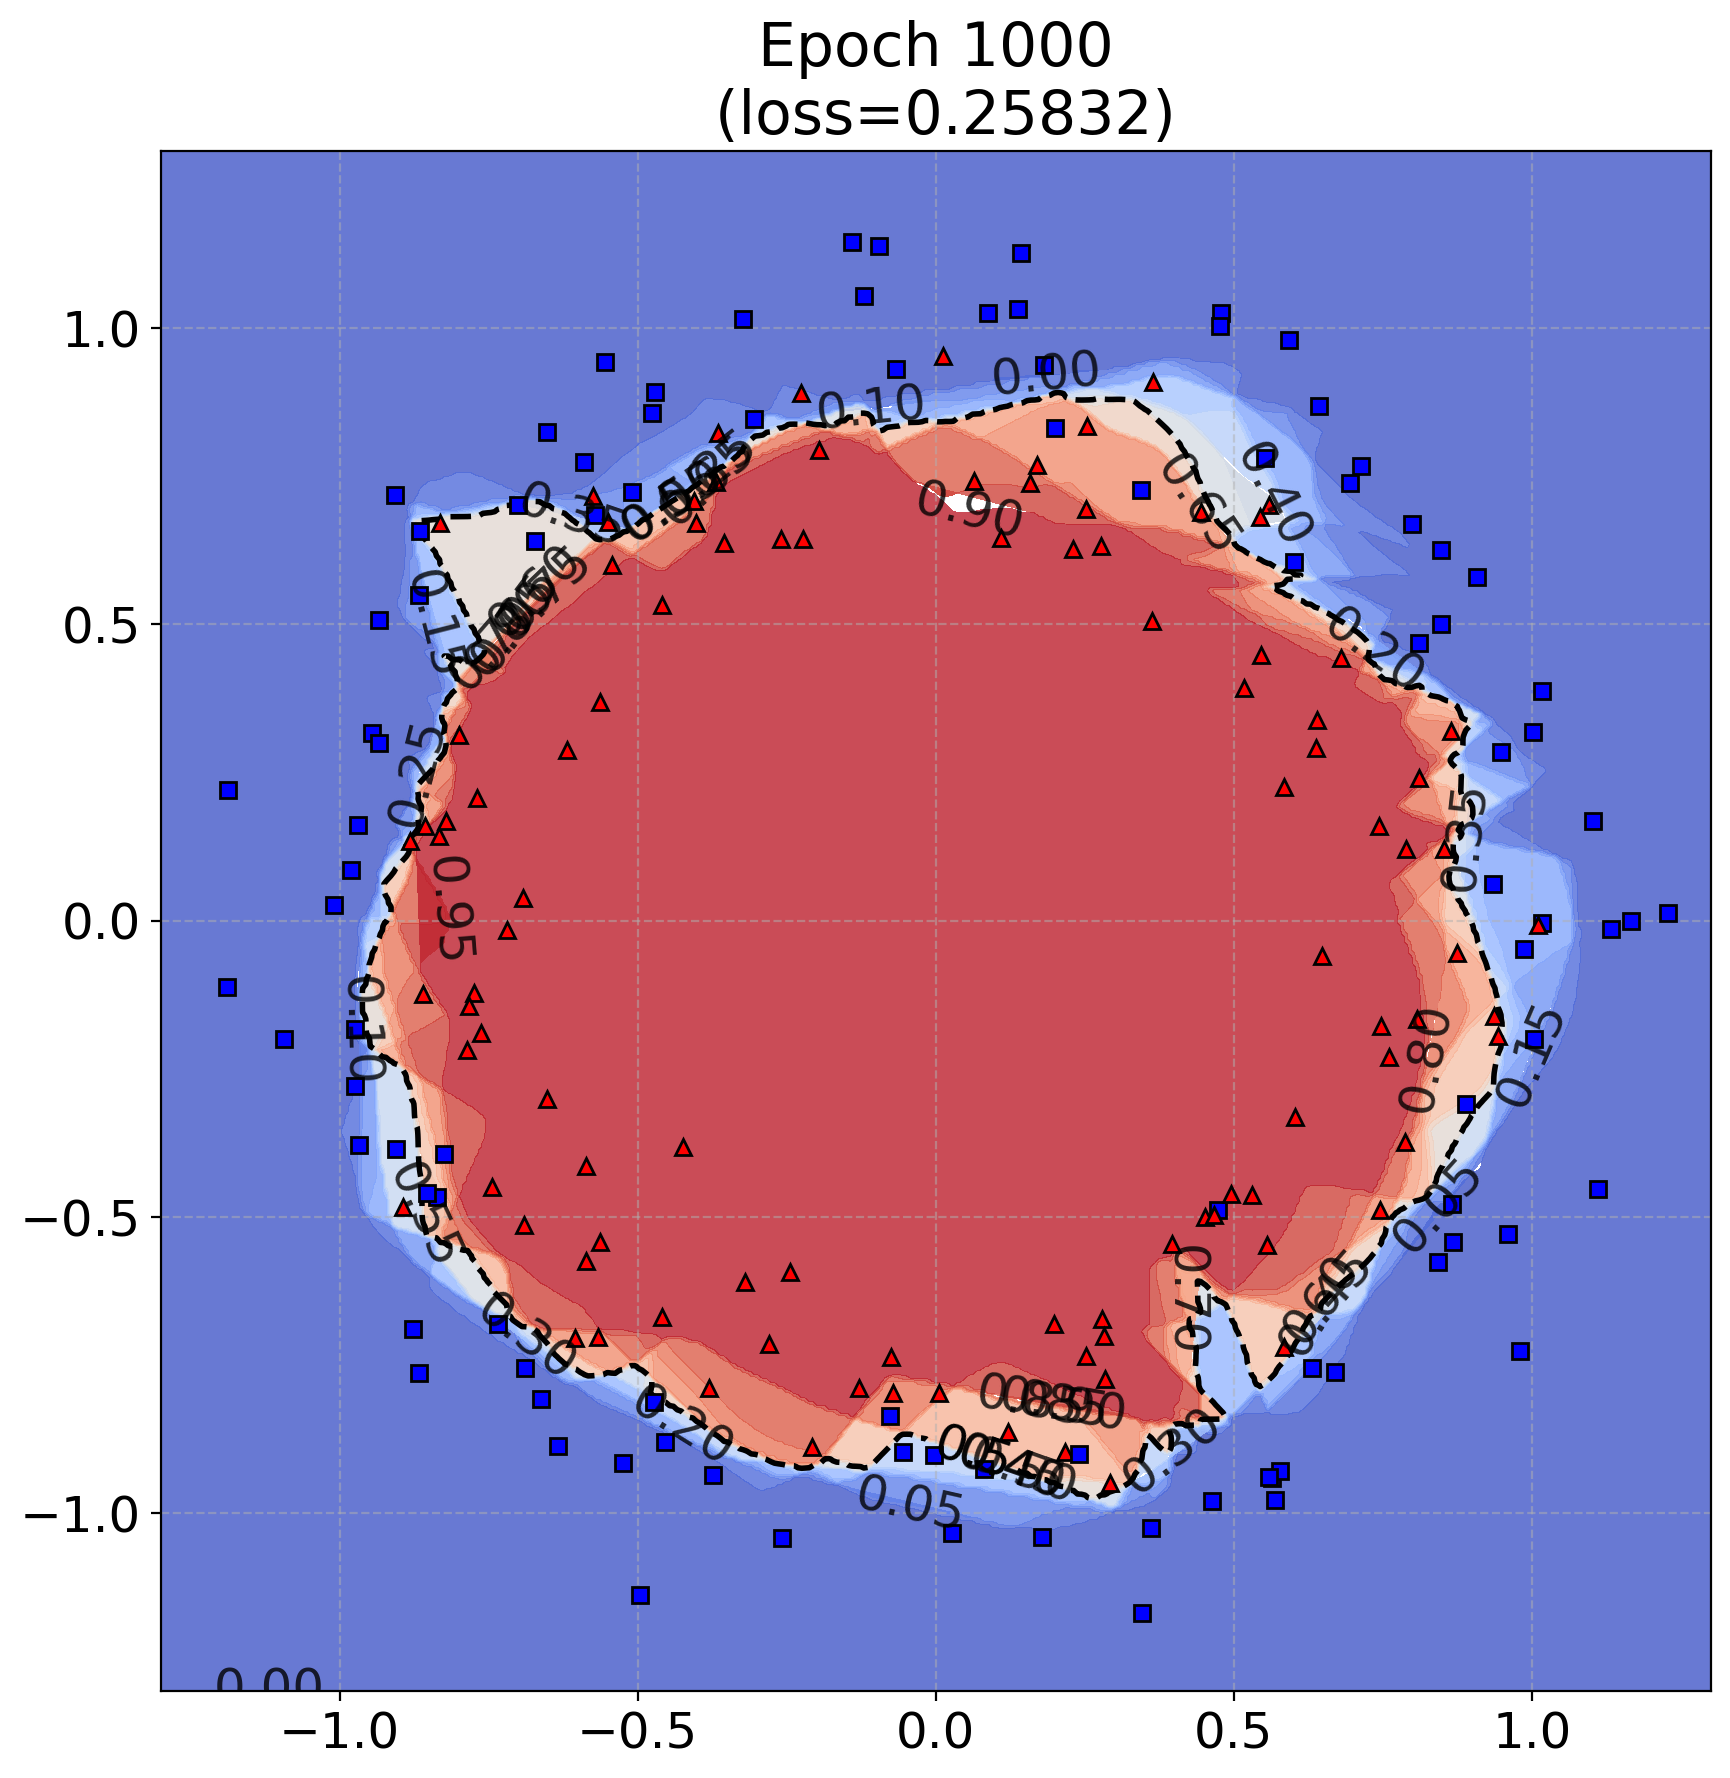

In [30]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.5f})'.format(MaxEpochs, final_loss[0]))

### 체커보드 예제

In [31]:
# 데이터
np.random.seed(410)
xy = np.random.uniform(-1,1, (200,2))
labels = np.zeros((200), dtype=np.int32)
labels[xy[:,0] * xy[:,1] > 0] = 1
labels = labels.reshape(-1, 1)

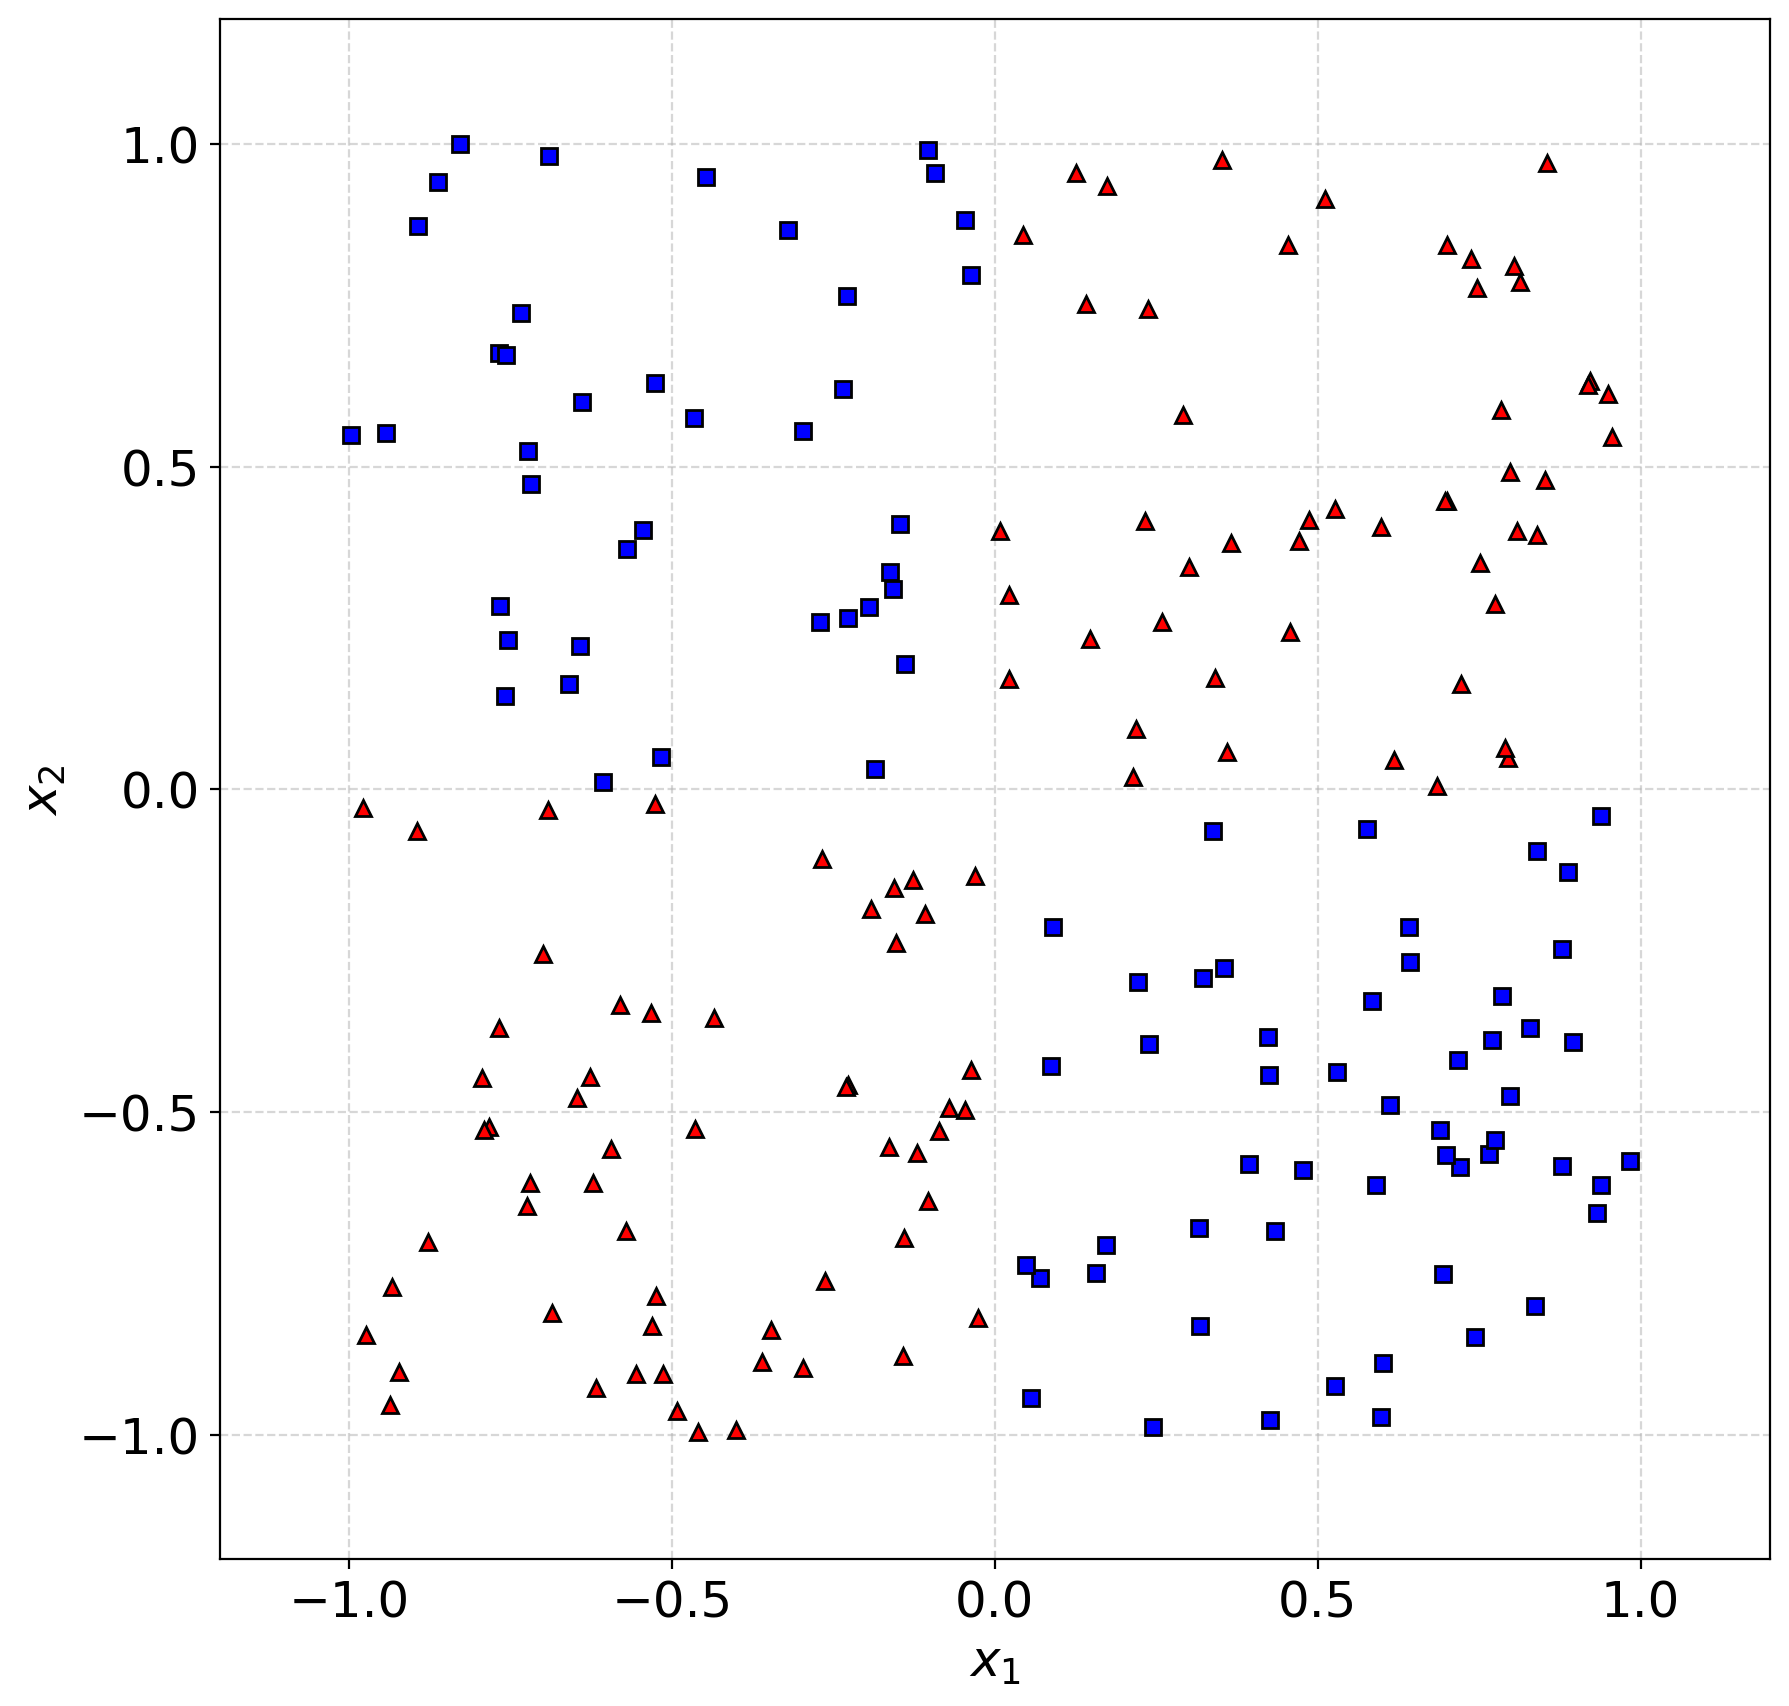

In [32]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(10, 10))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.show()

**<span style="font-size: 20px; color: blue">(Exercise 2) </span>** 

체커보드 데이터 분포에 대하여 신경망 분류 모델을 정의하고 학습하시오.

- 활성함수는 모든 레이어에서 시그모이드 함수를 사용하시오.

In [33]:
# 특성값
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

In [39]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
                
        tf.random.set_seed(20)

        num_hidden1 = 50
        num_hidden2 = 50
        num_hidden3 = 50
        num_hidden4 = 50
        
        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624))
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624))

        self.W2 = tf.Variable(tf.random.normal([num_hidden1 , num_hidden2], seed=624))
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624))

        self.W3 = tf.Variable(tf.random.normal([num_hidden2 , num_hidden3], seed=624))
        self.b3 = tf.Variable(tf.random.normal([num_hidden3], seed=624))

        self.W4 = tf.Variable(tf.random.normal([num_hidden3 , num_hidden4], seed=624))
        self.b4 = tf.Variable(tf.random.normal([num_hidden4], seed=624))

        self.W5 = tf.Variable(tf.random.normal([num_hidden4 , 1], seed=624))
        self.b5 = tf.Variable(tf.random.normal([1], seed=624))

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        h3 = tf.nn.sigmoid(l3)

        l4 = tf.matmul(h3, self.W4) + self.b4
        h4 = tf.nn.sigmoid(l4)
        
        l5 = tf.matmul(h4, self.W5) + self.b5
        yhat = tf.nn.sigmoid(l5)
        return yhat

In [40]:
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 하이퍼 파라미터
MaxEpochs = 1000
lr = 0.0005
batch_size = 16

# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.legacy.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9752 - accuracy: 0.5350
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7520 - accuracy: 0.5350
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5750
Epoch 4/1000
13/13 [==============================] - 0s 923us/step - loss: 0.6547 - accuracy: 0.6150
Epoch 5/1000
13/13 [==============================] - 0s 914us/step - loss: 0.6302 - accuracy: 0.7150
Epoch 6/1000
13/13 [==============================] - 0s 958us/step - loss: 0.6030 - accuracy: 0.7700
Epoch 7/1000
13/13 [==============================] - 0s 888us/step - loss: 0.5718 - accuracy: 0.8350
Epoch 8/1000
13/13 [==============================] - 0s 958us/step - loss: 0.5382 - accuracy: 0.8550
Epoch 9/1000
13/13 [==============================] - 0s 877us/step - loss: 0.5067 - accuracy: 0.8950
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4784 - accu

Epoch 82/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9950
Epoch 83/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9950
Epoch 84/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9950
Epoch 85/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 0.9950
Epoch 86/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9950
Epoch 87/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9950
Epoch 88/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9950
Epoch 89/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9950
Epoch 90/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9950
Epoch 91/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0625 - accurac

13/13 [==============================] - 0s 992us/step - loss: 0.0355 - accuracy: 0.9950
Epoch 163/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0353 - accuracy: 0.9950
Epoch 164/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9950
Epoch 165/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9950
Epoch 166/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.9950
Epoch 167/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9950
Epoch 168/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9950
Epoch 169/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.9950
Epoch 170/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9950
Epoch 171/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 

13/13 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 243/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 1.0000
Epoch 244/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 245/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 246/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 247/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 1.0000
Epoch 248/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 249/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 250/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 251/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 1.

13/13 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 323/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 324/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 325/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 326/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 327/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 328/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 329/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 330/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 331/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 1.

13/13 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 407/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 408/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 409/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 410/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 411/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 1.

13/13 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 483/1000
13/13 [==============================] - 0s 984us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 484/1000
13/13 [==============================] - 0s 961us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 485/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 486/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 487/1000
13/13 [==============================] - 0s 962us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 488/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 489/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 490/1000
13/13 [==============================] - 0s 963us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 491/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0076 - accu

13/13 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 563/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 564/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 565/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 566/1000
13/13 [==============================] - 0s 936us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 567/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 568/1000
13/13 [==============================] - 0s 976us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 569/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 570/1000
13/13 [==============================] - 0s 959us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 571/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0057 - accura

13/13 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 643/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 644/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 645/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 646/1000
13/13 [==============================] - 0s 956us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 647/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 648/1000
13/13 [==============================] - 0s 955us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 649/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 650/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 651/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy

13/13 [==============================] - 0s 996us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 723/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 724/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 725/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 726/1000
13/13 [==============================] - 0s 976us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 727/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 728/1000
13/13 [==============================] - 0s 979us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 729/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 730/1000
13/13 [==============================] - 0s 986us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 731/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0030 - accu

13/13 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 803/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 804/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 805/1000
13/13 [==============================] - 0s 975us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 806/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 807/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 808/1000
13/13 [==============================] - 0s 962us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 809/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 810/1000
13/13 [==============================] - 0s 981us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 811/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0021 - accura

13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 883/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 884/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 885/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 886/1000
13/13 [==============================] - 0s 906us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 

13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 963/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 964/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 965/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 966/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 967/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 968/1000
13/13 [==============================] - 0s 957us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 969/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 970/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 971/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 

In [41]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 958us/step - loss: 6.9312e-04 - accuracy: 1.0000
[0.0006931248353794217, 1.0]


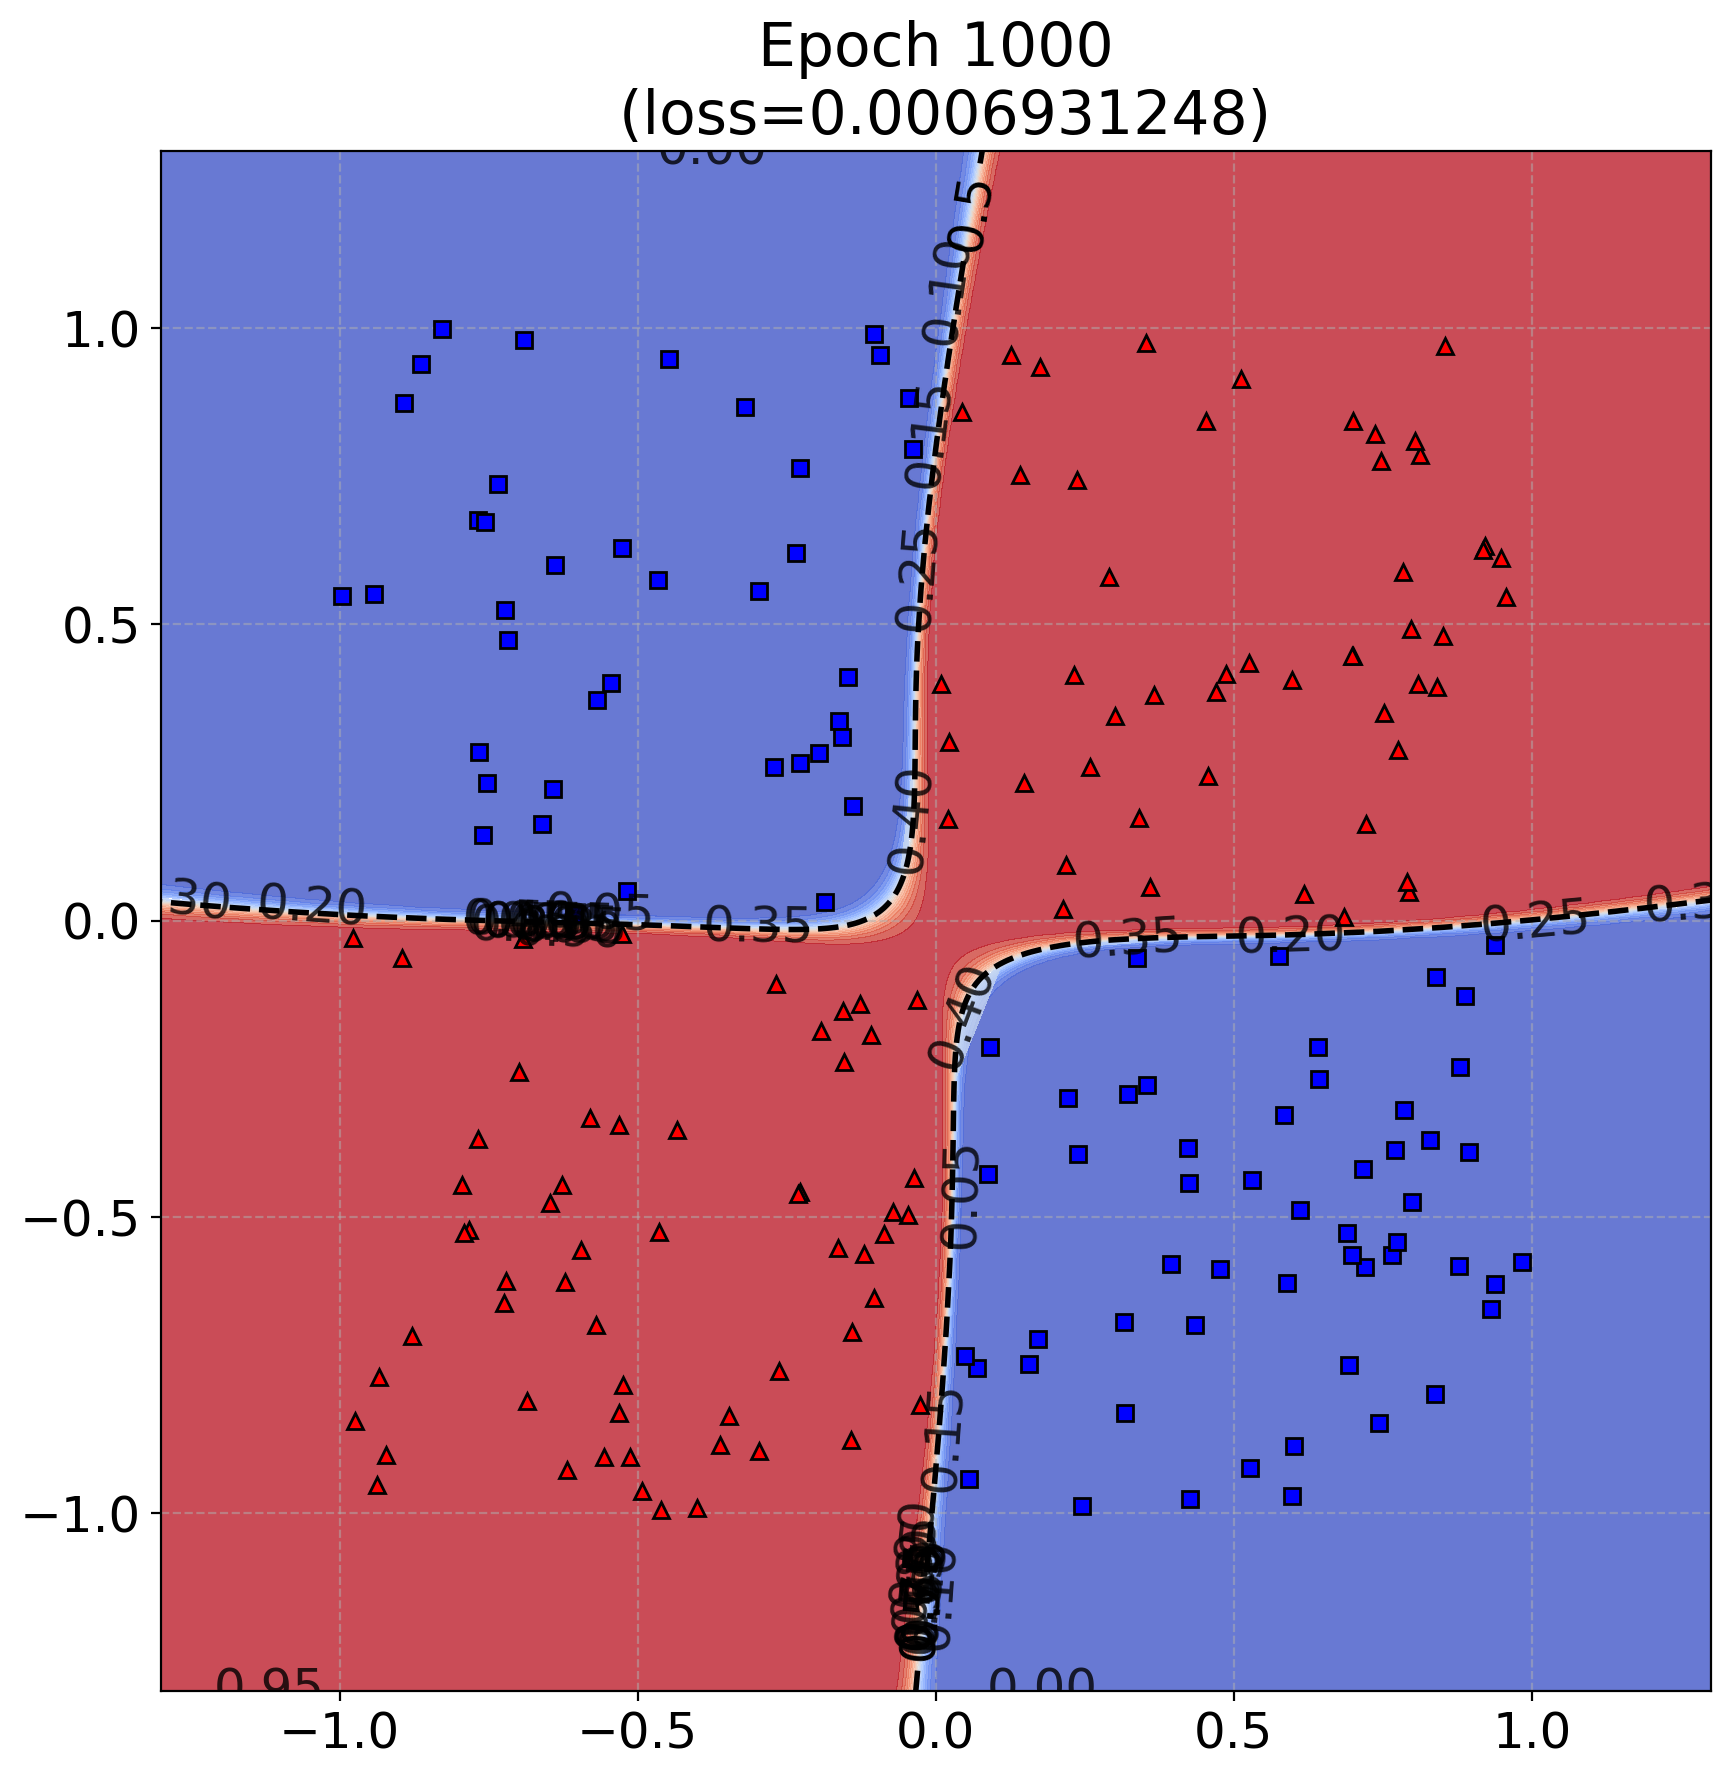

In [42]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.10f})'.format(MaxEpochs, final_loss[0]))

### 불규칙 데이터

In [43]:
from sklearn.datasets import make_blobs
# 불규칙 데이터 생성
xy, labels = make_blobs(n_samples=200, center_box=(-1,1), centers=6,cluster_std=0.1, random_state=20)
labels = labels % 2
labels = labels.reshape(-1,1)

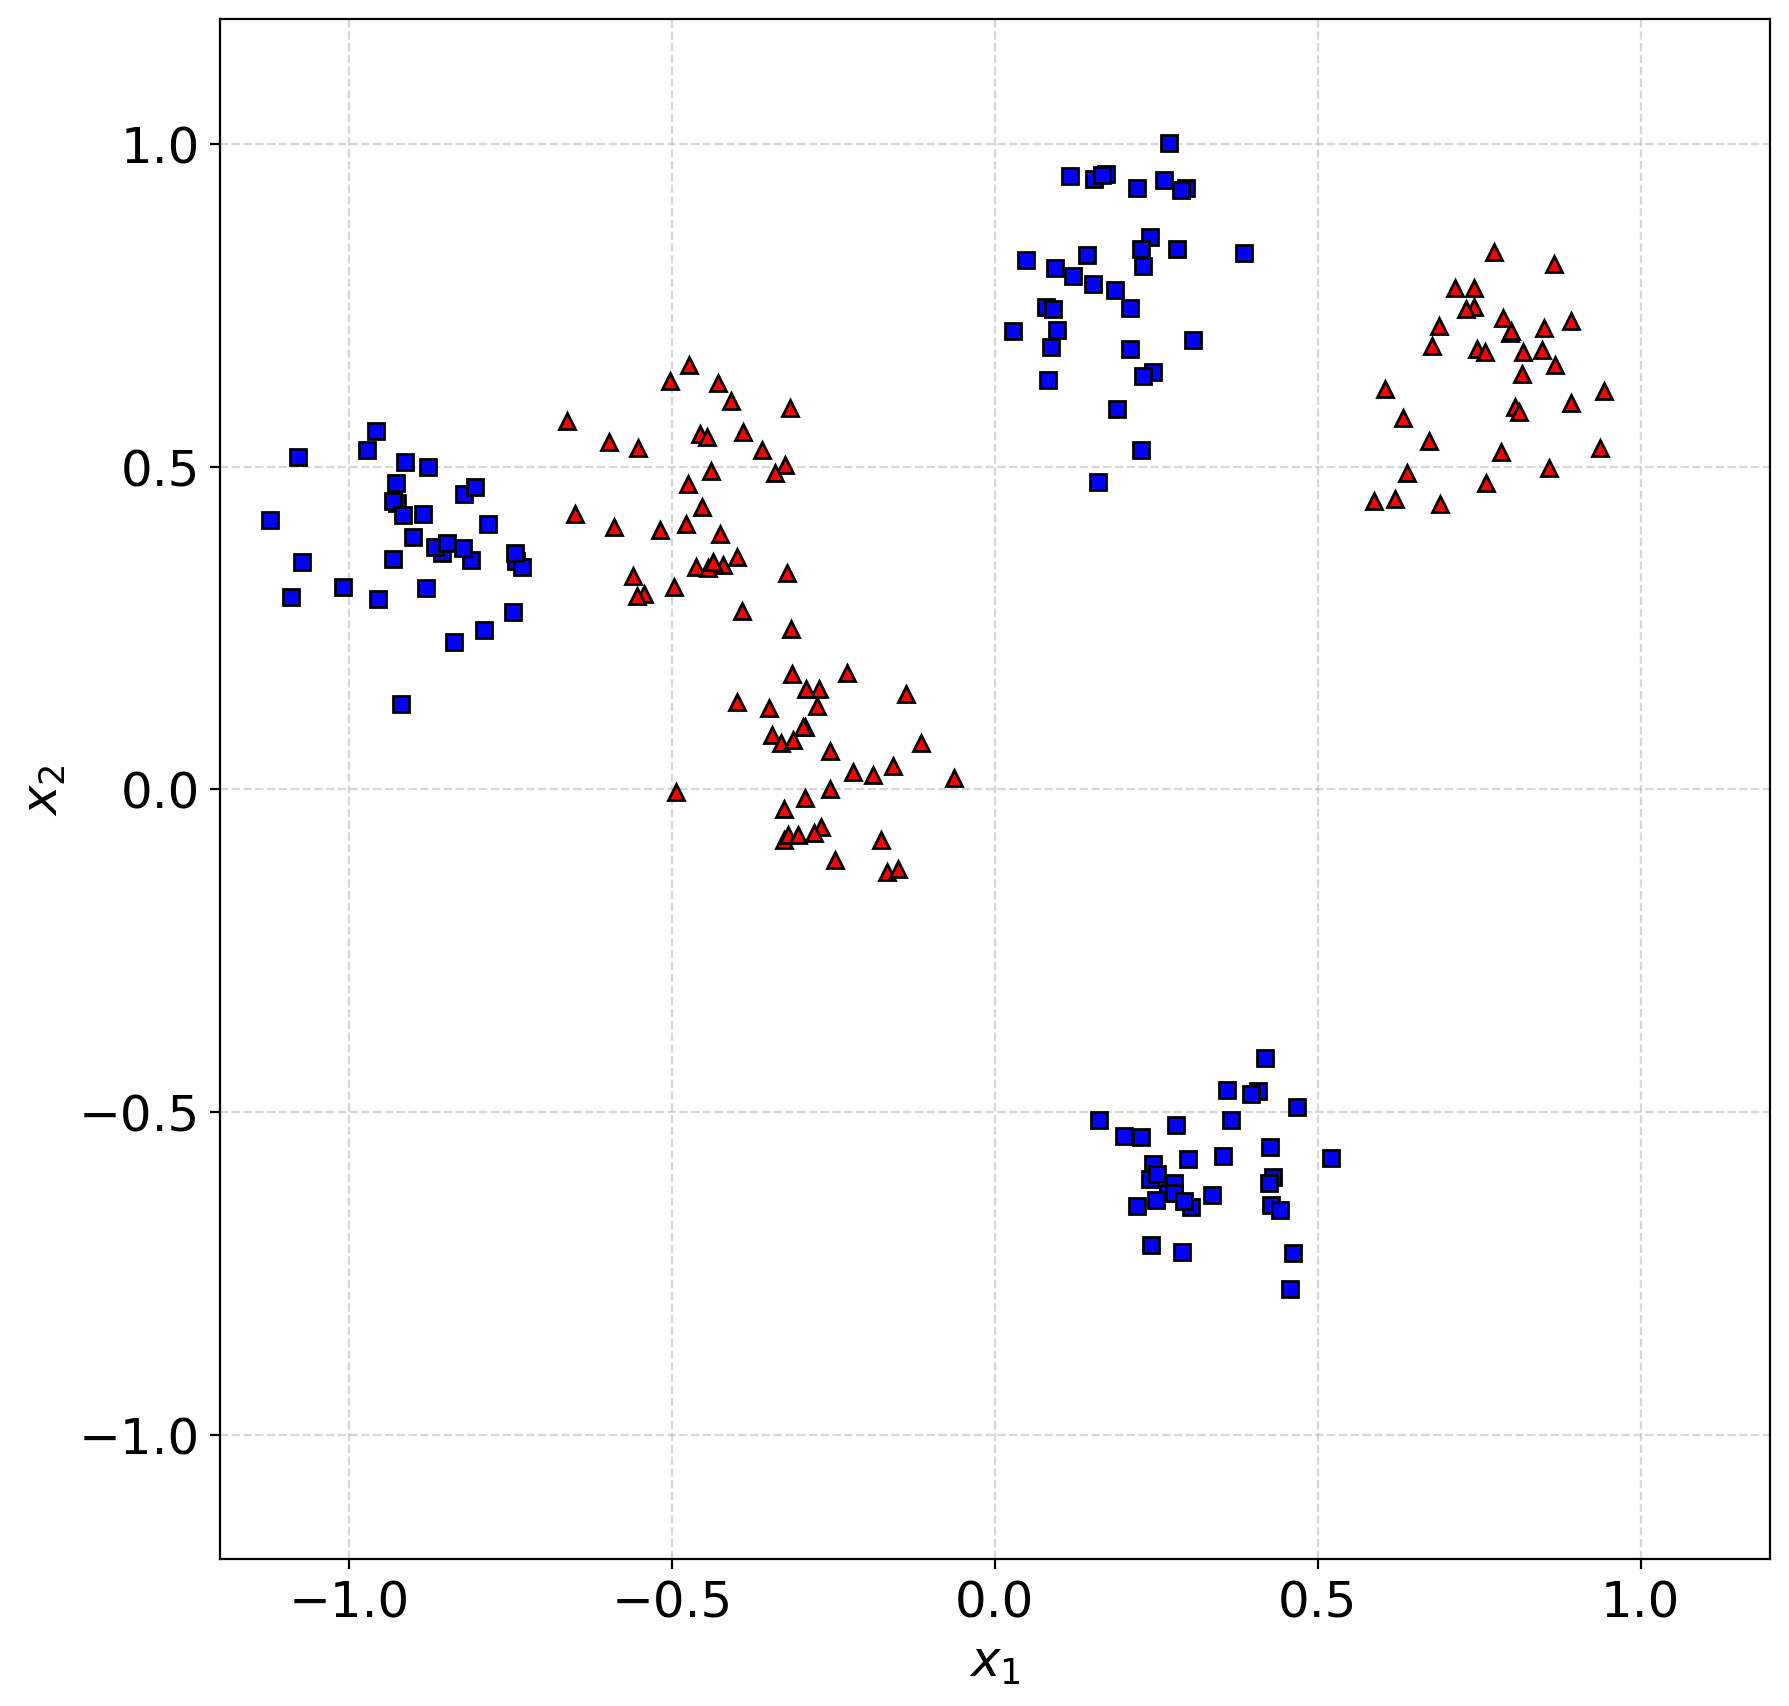

In [44]:
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(10, 10))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
# plt.legend([0, 1])
plt.show()

**<span style="font-size: 20px; color: blue">(Exercise 3) </span>** 

불규칙 데이터 분포에 대하여 신경망 분류 모델을 정의하고 학습하시오.

- 활성함수는 모든 레이어에서 시그모이드 함수를 사용하시오.

In [45]:
# 특성값
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

In [46]:
# 신경망 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
                        
        tf.random.set_seed(20)

        num_hidden1 = 50
        num_hidden2 = 50
        num_hidden3 = 50
        num_hidden4 = 50
        
        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624))
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624))

        self.W2 = tf.Variable(tf.random.normal([num_hidden1 , num_hidden2], seed=624))
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624))

        self.W3 = tf.Variable(tf.random.normal([num_hidden2 , num_hidden3], seed=624))
        self.b3 = tf.Variable(tf.random.normal([num_hidden3], seed=624))

        self.W4 = tf.Variable(tf.random.normal([num_hidden3 , num_hidden4], seed=624))
        self.b4 = tf.Variable(tf.random.normal([num_hidden4], seed=624))

        self.W5 = tf.Variable(tf.random.normal([num_hidden4 , 1], seed=624))
        self.b5 = tf.Variable(tf.random.normal([1], seed=624))

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        h3 = tf.nn.sigmoid(l3)

        l4 = tf.matmul(h3, self.W4) + self.b4
        h4 = tf.nn.sigmoid(l4)
        
        l5 = tf.matmul(h4, self.W5) + self.b5
        yhat = tf.nn.sigmoid(l5)        
        return yhat

In [48]:
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 하이퍼 파라미터
MaxEpochs = 1000
lr = 0.001
batch_size = 16

# 수치 최적화 방법 및 손실함수
optimizer = tf.keras.optimizers.legacy.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

# 컴파일 및 학습
model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9022 - accuracy: 0.5000
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.5650
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.4600
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.7700
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6032 - accuracy: 0.8100
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5866 - accuracy: 0.8100
Epoch 7/1000
13/13 [==============================] - 0s 973us/step - loss: 0.5718 - accuracy: 0.8200
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5574 - accuracy: 0.8250
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5422 - accuracy: 0.8300
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.83

13/13 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 83/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 84/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 85/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 86/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 87/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 88/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 89/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 90/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 91/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 163/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 164/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 165/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 166/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 167/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 168/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 169/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 170/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 171/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.

13/13 [==============================] - 0s 1ms/step - loss: 4.8999e-04 - accuracy: 1.0000
Epoch 241/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.8500e-04 - accuracy: 1.0000
Epoch 242/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.8009e-04 - accuracy: 1.0000
Epoch 243/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.7524e-04 - accuracy: 1.0000
Epoch 244/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.7046e-04 - accuracy: 1.0000
Epoch 245/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.6573e-04 - accuracy: 1.0000
Epoch 246/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.6107e-04 - accuracy: 1.0000
Epoch 247/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.5647e-04 - accuracy: 1.0000
Epoch 248/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.5193e-04 - accuracy: 1.0000
Epoch 249/1000
13/13 [==============================] - 0s 2m

13/13 [==============================] - 0s 2ms/step - loss: 1.7134e-04 - accuracy: 1.0000
Epoch 318/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.6955e-04 - accuracy: 1.0000
Epoch 319/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6779e-04 - accuracy: 1.0000
Epoch 320/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.6606e-04 - accuracy: 1.0000
Epoch 321/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.6436e-04 - accuracy: 1.0000
Epoch 322/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.6268e-04 - accuracy: 1.0000
Epoch 323/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.6102e-04 - accuracy: 1.0000
Epoch 324/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.5939e-04 - accuracy: 1.0000
Epoch 325/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.5778e-04 - accuracy: 1.0000
Epoch 326/1000
13/13 [==============================] - 0s 1m

13/13 [==============================] - 0s 1ms/step - loss: 7.9888e-05 - accuracy: 1.0000
Epoch 395/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.9143e-05 - accuracy: 1.0000
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 7.8411e-05 - accuracy: 1.0000
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.7692e-05 - accuracy: 1.0000
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 7.6984e-05 - accuracy: 1.0000
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.6286e-05 - accuracy: 1.0000
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 7.5599e-05 - accuracy: 1.0000
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.4921e-05 - accuracy: 1.0000
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.4253e-05 - accuracy: 1.0000
Epoch 403/1000
13/13 [==============================] - 0s 1m

13/13 [==============================] - 0s 1ms/step - loss: 4.1994e-05 - accuracy: 1.0000
Epoch 472/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.1667e-05 - accuracy: 1.0000
Epoch 473/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.1343e-05 - accuracy: 1.0000
Epoch 474/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.1022e-05 - accuracy: 1.0000
Epoch 475/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.0704e-05 - accuracy: 1.0000
Epoch 476/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.0390e-05 - accuracy: 1.0000
Epoch 477/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.0077e-05 - accuracy: 1.0000
Epoch 478/1000
13/13 [==============================] - 0s 1ms/step - loss: 3.9768e-05 - accuracy: 1.0000
Epoch 479/1000
13/13 [==============================] - 0s 1ms/step - loss: 3.9462e-05 - accuracy: 1.0000
Epoch 480/1000
13/13 [==============================] - 0s 1m

13/13 [==============================] - 0s 1ms/step - loss: 2.3598e-05 - accuracy: 1.0000
Epoch 549/1000
13/13 [==============================] - 0s 1ms/step - loss: 2.3428e-05 - accuracy: 1.0000
Epoch 550/1000
13/13 [==============================] - 0s 1ms/step - loss: 2.3260e-05 - accuracy: 1.0000
Epoch 551/1000
13/13 [==============================] - 0s 1ms/step - loss: 2.3092e-05 - accuracy: 1.0000
Epoch 552/1000
13/13 [==============================] - 0s 1ms/step - loss: 2.2926e-05 - accuracy: 1.0000
Epoch 553/1000
13/13 [==============================] - 0s 1ms/step - loss: 2.2761e-05 - accuracy: 1.0000
Epoch 554/1000
13/13 [==============================] - 0s 1ms/step - loss: 2.2598e-05 - accuracy: 1.0000
Epoch 555/1000
13/13 [==============================] - 0s 1ms/step - loss: 2.2436e-05 - accuracy: 1.0000
Epoch 556/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.2275e-05 - accuracy: 1.0000
Epoch 557/1000
13/13 [==============================] - 0s 1m

13/13 [==============================] - 0s 2ms/step - loss: 1.3679e-05 - accuracy: 1.0000
Epoch 626/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.3584e-05 - accuracy: 1.0000
Epoch 627/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.3490e-05 - accuracy: 1.0000
Epoch 628/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3397e-05 - accuracy: 1.0000
Epoch 629/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3304e-05 - accuracy: 1.0000
Epoch 630/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3212e-05 - accuracy: 1.0000
Epoch 631/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.3121e-05 - accuracy: 1.0000
Epoch 632/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3030e-05 - accuracy: 1.0000
Epoch 633/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.2940e-05 - accuracy: 1.0000
Epoch 634/1000
13/13 [==============================] - 0s 1m

13/13 [==============================] - 0s 2ms/step - loss: 8.0648e-06 - accuracy: 1.0000
Epoch 703/1000
13/13 [==============================] - 0s 1ms/step - loss: 8.0103e-06 - accuracy: 1.0000
Epoch 704/1000
13/13 [==============================] - 0s 2ms/step - loss: 7.9562e-06 - accuracy: 1.0000
Epoch 705/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.9026e-06 - accuracy: 1.0000
Epoch 706/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.8492e-06 - accuracy: 1.0000
Epoch 707/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.7963e-06 - accuracy: 1.0000
Epoch 708/1000
13/13 [==============================] - 0s 2ms/step - loss: 7.7437e-06 - accuracy: 1.0000
Epoch 709/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.6915e-06 - accuracy: 1.0000
Epoch 710/1000
13/13 [==============================] - 0s 1ms/step - loss: 7.6397e-06 - accuracy: 1.0000
Epoch 711/1000
13/13 [==============================] - 0s 1m

13/13 [==============================] - 0s 2ms/step - loss: 4.8125e-06 - accuracy: 1.0000
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.7807e-06 - accuracy: 1.0000
Epoch 781/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.7490e-06 - accuracy: 1.0000
Epoch 782/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.7176e-06 - accuracy: 1.0000
Epoch 783/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.6865e-06 - accuracy: 1.0000
Epoch 784/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.6555e-06 - accuracy: 1.0000
Epoch 785/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.6248e-06 - accuracy: 1.0000
Epoch 786/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.5942e-06 - accuracy: 1.0000
Epoch 787/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.5639e-06 - accuracy: 1.0000
Epoch 788/1000
13/13 [==============================] - 0s 2m

13/13 [==============================] - 0s 2ms/step - loss: 2.9003e-06 - accuracy: 1.0000
Epoch 857/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.8814e-06 - accuracy: 1.0000
Epoch 858/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.8627e-06 - accuracy: 1.0000
Epoch 859/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.8441e-06 - accuracy: 1.0000
Epoch 860/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.8257e-06 - accuracy: 1.0000
Epoch 861/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.8073e-06 - accuracy: 1.0000
Epoch 862/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.7891e-06 - accuracy: 1.0000
Epoch 863/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.7710e-06 - accuracy: 1.0000
Epoch 864/1000
13/13 [==============================] - 0s 1ms/step - loss: 2.7530e-06 - accuracy: 1.0000
Epoch 865/1000
13/13 [==============================] - 0s 1m

13/13 [==============================] - 0s 962us/step - loss: 1.7626e-06 - accuracy: 1.0000
Epoch 934/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.7513e-06 - accuracy: 1.0000
Epoch 935/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.7401e-06 - accuracy: 1.0000
Epoch 936/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.7290e-06 - accuracy: 1.0000
Epoch 937/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.7179e-06 - accuracy: 1.0000
Epoch 938/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.7070e-06 - accuracy: 1.0000
Epoch 939/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.6961e-06 - accuracy: 1.0000
Epoch 940/1000
13/13 [==============================] - 0s 879us/step - loss: 1.6852e-06 - accuracy: 1.0000
Epoch 941/1000
13/13 [==============================] - 0s 951us/step - loss: 1.6745e-06 - accuracy: 1.0000
Epoch 942/1000
13/13 [==============================] -

In [49]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

7/7 [==============================] - 0s 900us/step - loss: 1.1306e-06 - accuracy: 1.0000
[1.130555347117479e-06, 1.0]


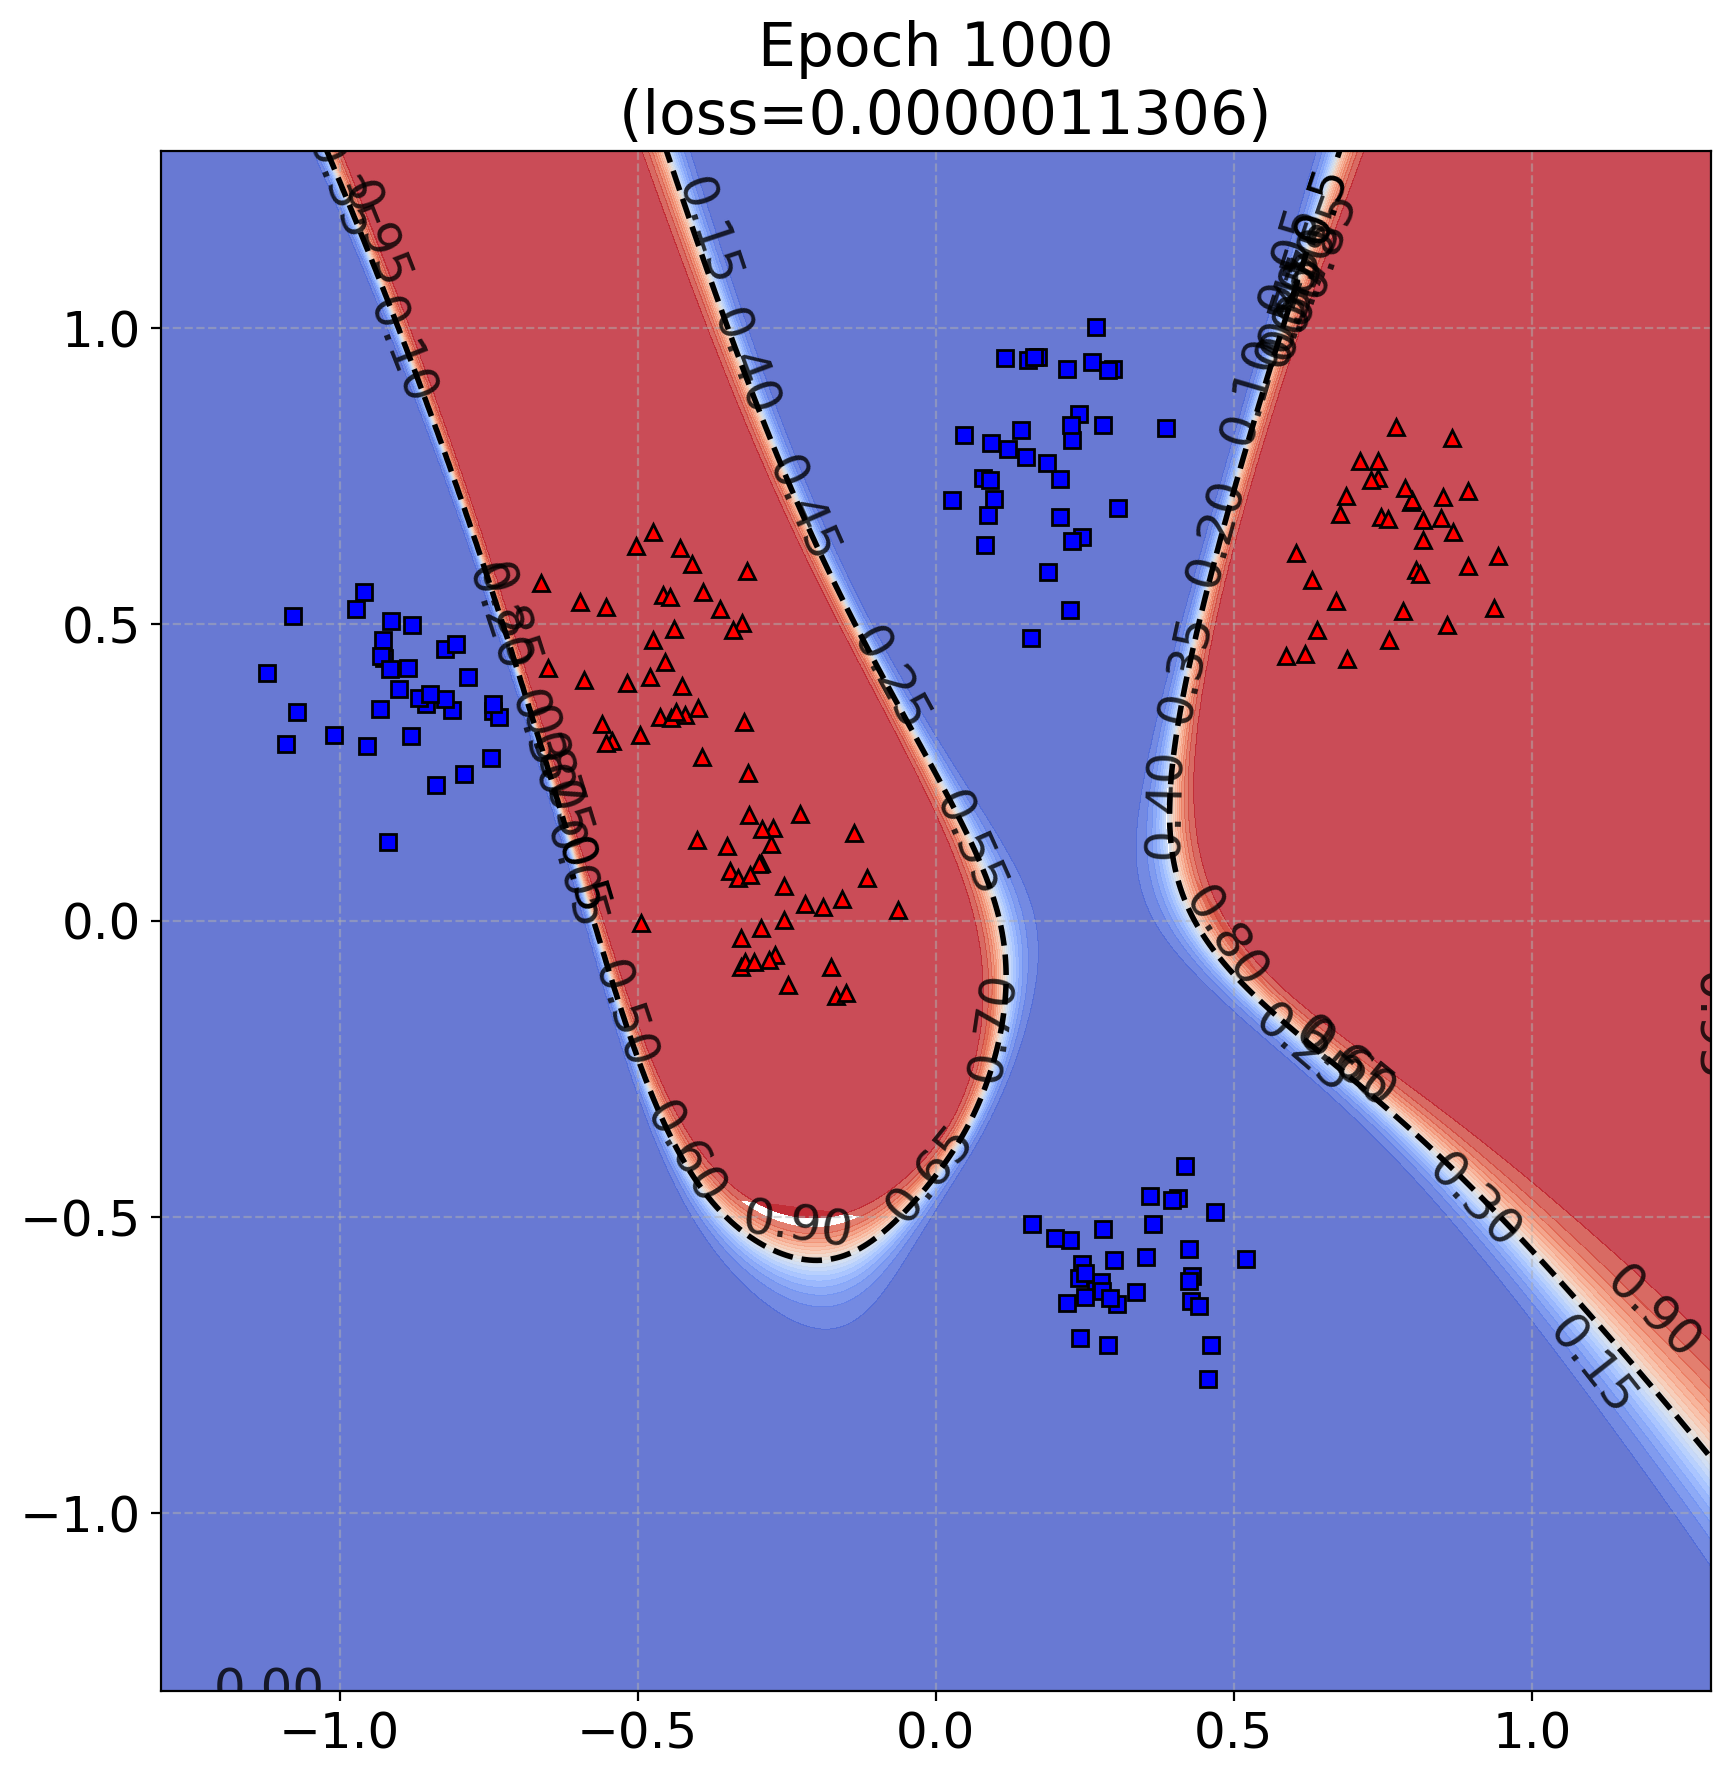

In [50]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.10f})'.format(MaxEpochs, final_loss[0]))

### 불규칙 데이터 - ReLU

**<span style="font-size: 20px; color: blue">(Exercise 4) </span>** 

불규칙 데이터 분포에 대하여 신경망 분류 모델을 정의하고 학습하시오.

- 활성함수는 모든 레이어에서 ReLU 함수를 사용하시오.

In [51]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        

    def call(self, x):
        
        return yhat

In [53]:
MaxEpochs = None
lr = None
batch_size = None

optimizer = tf.keras.optimizers.legacy.Adam(lr)
loss = tf.keras.losses.BinaryCrossentropy()

model = MyModel()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

In [ ]:
# 예측 및 손실함수
prediction_values = model(features).numpy()
final_loss = model.evaluate(features,labels)
print(final_loss)

In [ ]:
plot_model(model, f_fn, xy, labels, 'Epoch {}\n (loss={:1.2f})'.format(MaxEpochs, final_loss[0]))